# Data Input and preprocessing

In [1]:
import numpy as np
from function import loadData, show_data, preprocessing, showDistribution, removenans, crossplot, kMeans

## Load Data

In [2]:
data = np.load('C:/Users/12928/Desktop/SyntheticDatasets/Model5b/output_fields_smooth.npz')

data_list = loadData(data)


## Plot Input Data

<ipython-input-3-a7b260df410e>:6: RuntimeWarning: divide by zero encountered in true_divide
  data_list[1]= 1./data_list[1]


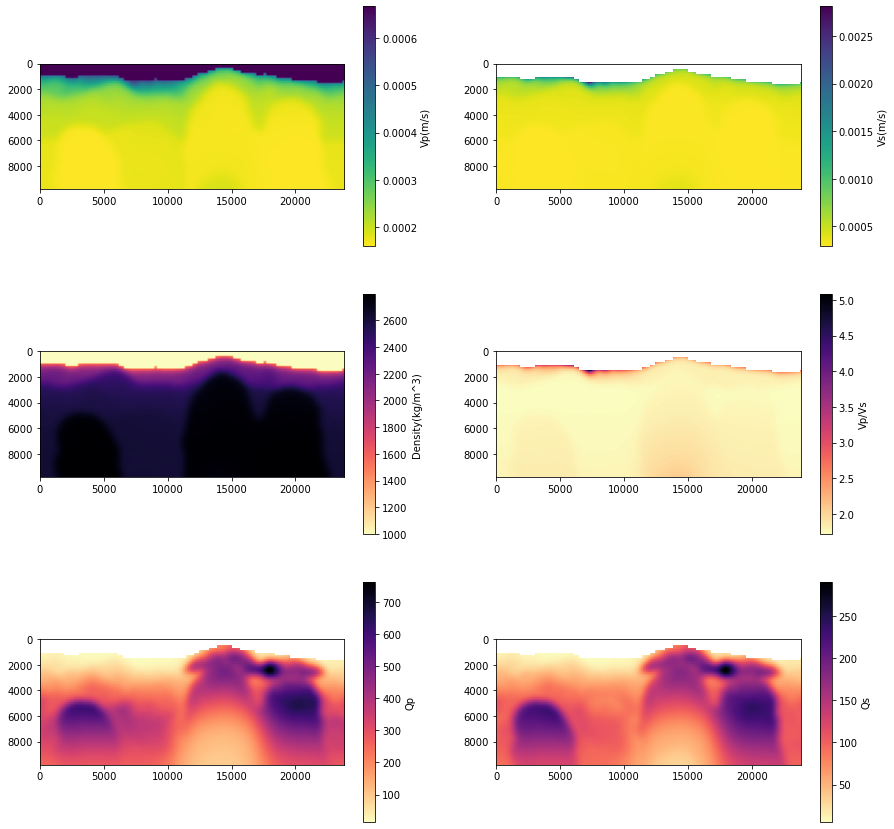

In [3]:
# Move this to a dataclean function
data_inf = np.isinf(data_list[3])
data_list[3][data_inf] = np.nan

data_list[0]= 1./data_list[0]
data_list[1]= 1./data_list[1]
data_inf = np.isinf(data_list[1])
data_list[1][data_inf] = np.nan

show_data(data_list,3,2)

In [4]:
new_data,data_noNan,remove_list = removenans(data)

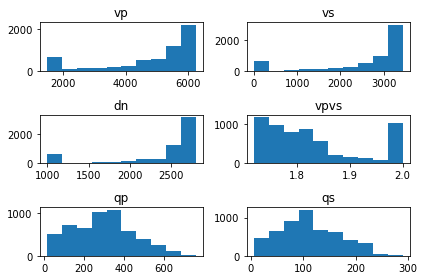

In [5]:
new_data[:,3]=np.clip(new_data[:,3],None,2)
showDistribution(new_data[:,:-2])

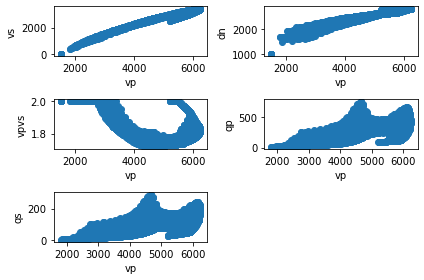

In [6]:
# Rewrite the crossplot function. This function should plot the cross-plot (scatter plot)
# of each pair of physical properties

# Here is an example. Turn it into a nice function like the showDistribution function
crossplot(new_data)

## Data Preprocessing

In [8]:
# I am unsure about what is happening with Standard Scaler
# Try replacing it with a normalization funciton that you write from scratch
#- remove the mean
#- divide by the variance
# Example:

data_preprocessing = preprocessing(data_noNan) 
#data_new = preprocessing(data_list)

(5329, 8)


## Plot Data after Preprocessing

(6000, 8)


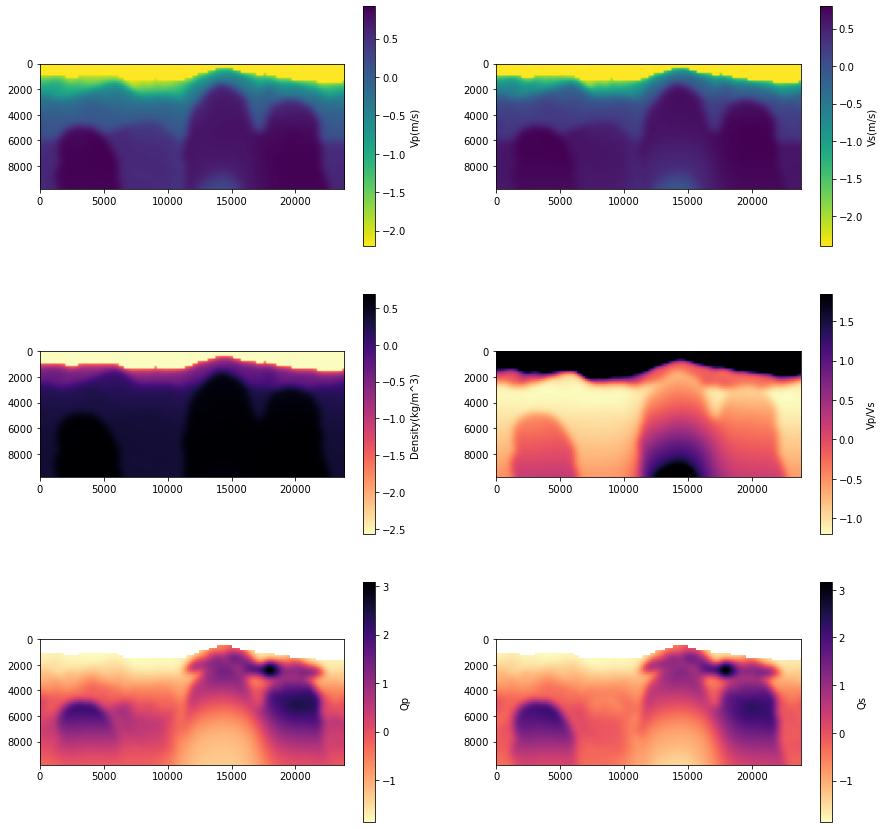

In [21]:
data_list = []
data1 = preprocessing(new_data)
for i in range(data_preprocessing.shape[1]-2):
    data_list.append(data1[:,i].reshape(50,120))
show_data(data_list,3,2)

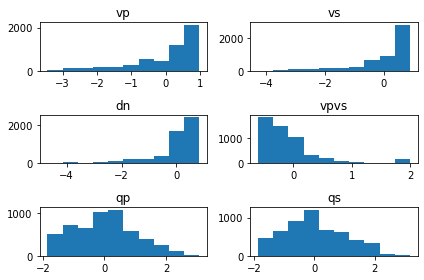

In [9]:
data_preprocessing[:,3]=np.clip(data_preprocessing[:,3],None,2)
showDistribution(data_preprocessing[:,:-2])

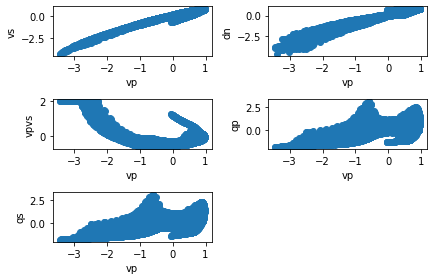

In [10]:
crossplot(data_preprocessing)

In [11]:
centroids,clusterAssment = kMeans(data_preprocessing,4)

C:\Users\12928\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\12928\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [12]:
print(clusterAssment)

[[0.00000000e+00 3.02455673e+11]
 [0.00000000e+00 3.02406740e+11]
 [0.00000000e+00 3.02356578e+11]
 ...
 [0.00000000e+00 5.17675733e+08]
 [0.00000000e+00 3.50212597e+08]
 [0.00000000e+00 1.77680686e+08]]


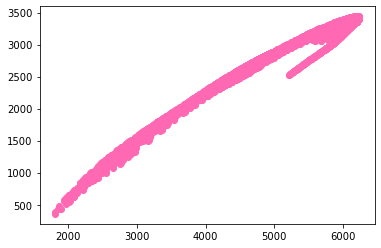

In [16]:
import matplotlib.pyplot as plt
col = ['HotPink','Aqua','Chartreuse','yellow','red','blue','green','grey','orange'] 
for i in range(data_noNan.shape[0]):
    plt.scatter(data_noNan[i][0],data_noNan[i][1],color=col[np.int(clusterAssment[i][0])])
plt.show()